In [22]:
# Simulation Design

library(hdm)

set.seed(1)
B= 20 # trials
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=100
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X = matrix(rnorm(n*p), n, p)
    
    
D=   X%*%gamma + rnorm(n)/4

Y =  D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=F)$res
resD = rlasso(D~ X, Post=F)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}


In [33]:
library(hdm)
getAnywhere( confint.rlassoEffects )

A single object matching 'confint.rlassoEffects' was found
It was found in the following places
  registered S3 method for confint from namespace hdm
  namespace:hdm
with value

function (object, parm, level = 0.95, joint = FALSE, ...) 
{
    B <- 500
    n <- object$samplesize
    k <- p1 <- length(object$coefficients)
    cf <- coef(object)
    pnames <- names(cf)
    if (missing(parm)) 
        parm <- pnames
    else if (is.numeric(parm)) 
        parm <- pnames[parm]
    if (!joint) {
        a <- (1 - level)/2
        a <- c(a, 1 - a)
        fac <- qnorm(a)
        pct <- format.perc(a, 3)
        ci <- array(NA, dim = c(length(parm), 2L), dimnames = list(parm, 
            pct))
        ses <- object$se[parm]
        ci[] <- cf[parm] + ses %o% fac
    }
    if (joint) {
        e <- object$residuals$e
        v <- object$residuals$v
        ev <- e * v
        Ev2 <- colMeans(v^2)
        Omegahat <- matrix(NA, ncol = k, nrow = k)
        for (j in 1:k) {
            for (l in 

In [24]:

function (object, parm, level = 0.95, joint = FALSE, ...) 
{
    B <- 500
    n <- object$samplesize
    k <- p1 <- length(object$coefficients)
    cf <- coef(object)
    pnames <- names(cf)
    if (missing(parm)) 
        parm <- pnames
    else if (is.numeric(parm)) 
        parm <- pnames[parm]
    if (!joint) {
        a <- (1 - level)/2
        a <- c(a, 1 - a)
        fac <- qnorm(a)
        pct <- format.perc(a, 3)
        ci <- array(NA, dim = c(length(parm), 2L), dimnames = list(parm, 
            pct))
        ses <- object$se[parm]
        ci[] <- cf[parm] + ses %o% fac
    }
    if (joint) {
        e <- object$residuals$e
        v <- object$residuals$v
        ev <- e * v
        Ev2 <- colMeans(v^2)
        Omegahat <- matrix(NA, ncol = k, nrow = k)
        for (j in 1:k) {
            for (l in 1:k) {
                Omegahat[j, l] = Omegahat[l, j] = 1/(Ev2[j] * 
                  Ev2[l]) * mean(ev[, j] * ev[, l])
            }
        }
        var <- diag(Omegahat)
        names(var) <- names(cf)
        sim <- vector("numeric", length = B)
        for (i in 1:B) {
            beta_i <- MASS::mvrnorm(mu = rep(0, k), Sigma = Omegahat/n)
            sim[i] <- max(abs(beta_i/sqrt(var)))
        }
        a <- (1 - level)
        ab <- c(a/2, 1 - a/2)
        pct <- format.perc(ab, 3)
        ci <- array(NA, dim = c(length(parm), 2L), dimnames = list(parm, 
            pct))
        hatc <- quantile(sim, probs = 1 - a)
        ci[, 1] <- cf[parm] - hatc * sqrt(var[parm])
        ci[, 2] <- cf[parm] + hatc * sqrt(var[parm])
    }
    return(ci)
}

D 
1.71871

In [25]:
hist$freq

ERROR: Error in hist$freq: object of type 'closure' is not subsettable


In [26]:
B$breaks

ERROR: Error in B$breaks: $ operator is invalid for atomic vectors


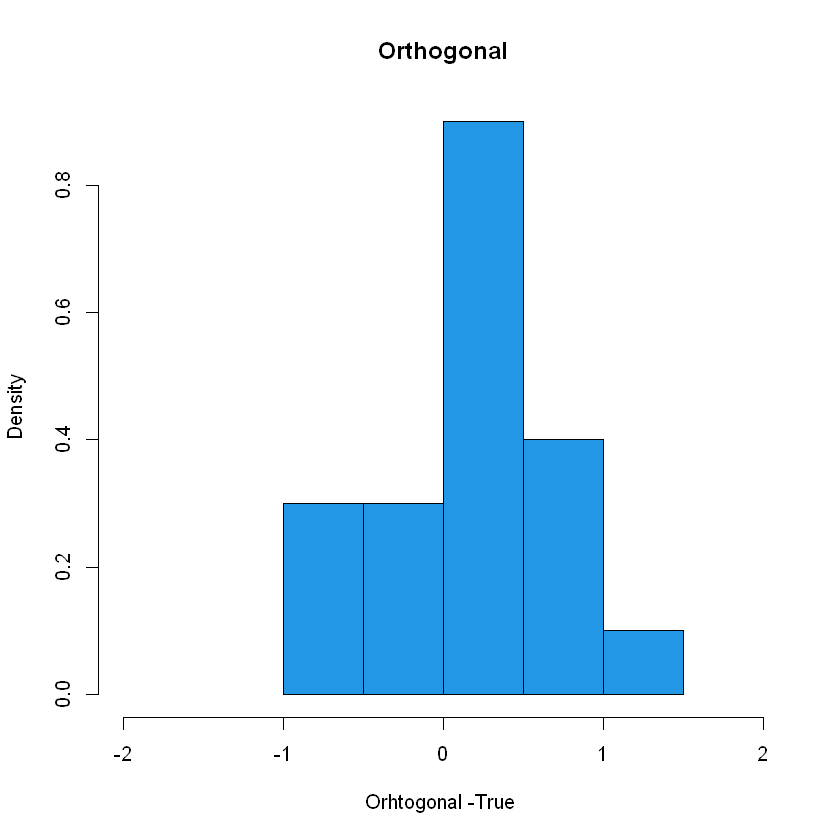

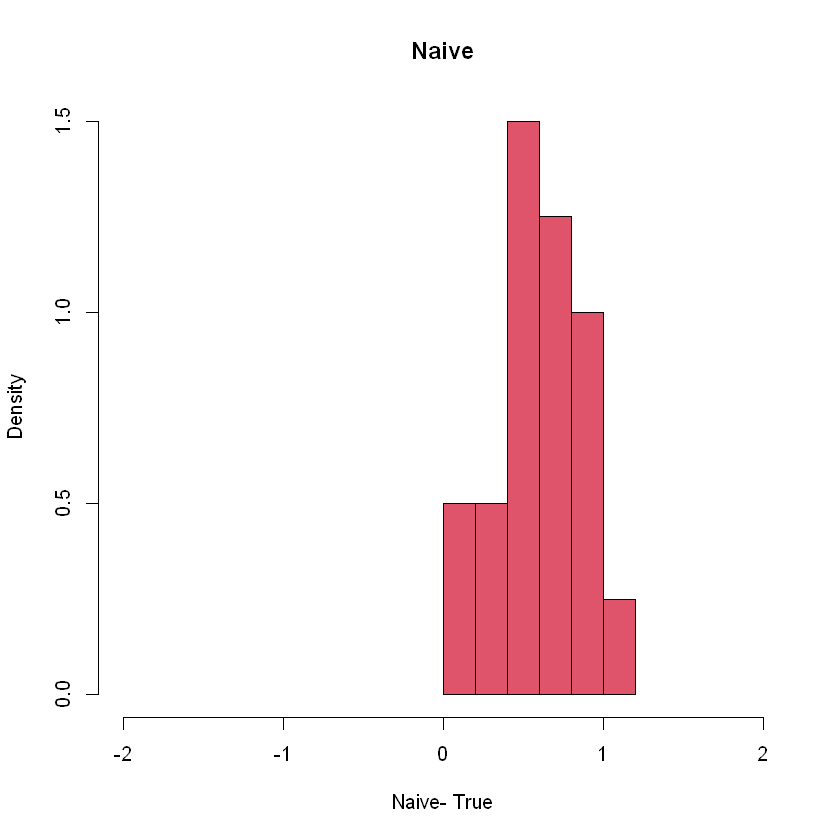

In [27]:
A = hist(Orthogonal-1,col=4, freq=F, xlim= c(-2, 2), xlab= "Orhtogonal -True ", main="Orthogonal")
B = hist(Naive-1, col=2, freq=F, xlim= c(-2,2), xlab= "Naive- True", main = "Naive")


In [29]:
library(hdm)

set.seed(1)
B= 20 # trials 
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=100
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D=   X%*%gamma + rnorm(n)/4

Y =  D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=T)$res
resD = rlasso(D~ X, Post=T)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}


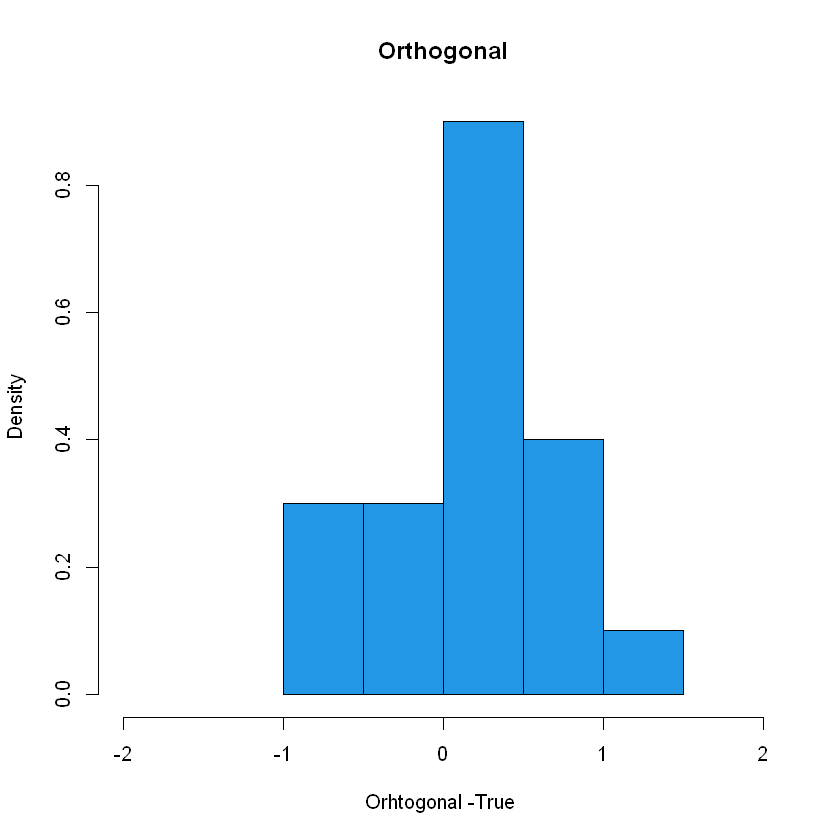

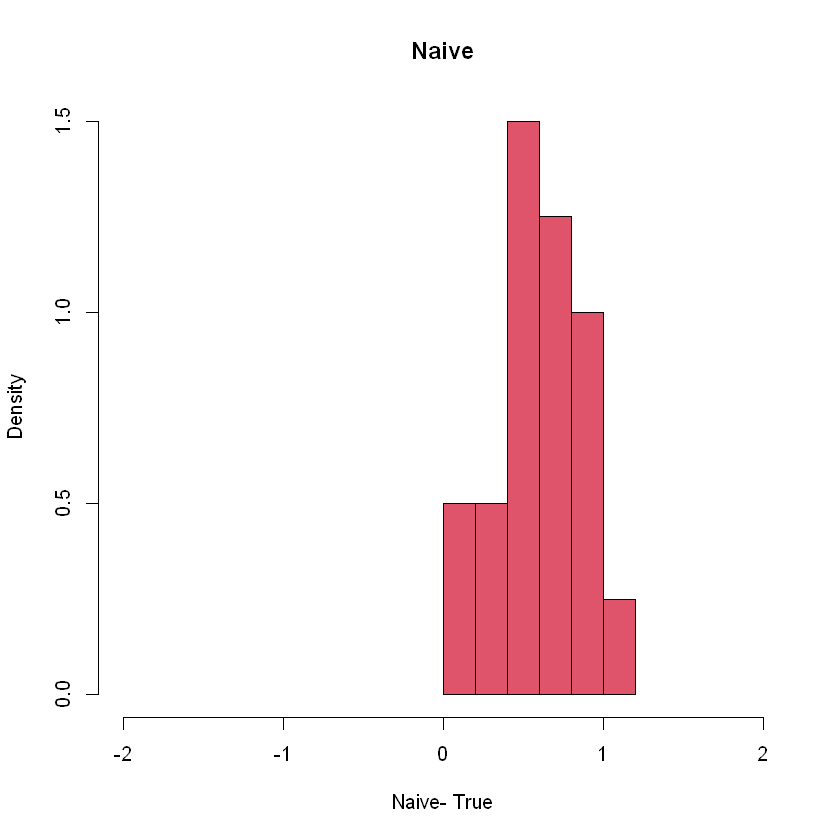

In [31]:
hist(Orthogonal-1,col=4, freq=F, xlim= c(-2, 2), xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-1, col=2, freq=F, xlim= c(-2,2), xlab= "Naive- True", main = "Naive")
